<a href="https://colab.research.google.com/github/Billyjr2003/deep-learning/blob/master/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile

data_set = '/content/cifar-10.zip'
with ZipFile(data_set,'r') as zip:
  zip.extractall()



In [ ]:
!pip install py7zr

In [ ]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z','r')
archive.extractall()
archive.close()

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
print(os.listdir('/content/train')[-5:])

['13263.png', '33483.png', '374.png', '46342.png', '5903.png']


In [ ]:
df = pd.read_csv('/content/trainLabels.csv')
df

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [ ]:
index = 0
df.iloc[0,1]

'frog'

In [ ]:
df['label'].unique()

array(['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
       'cat', 'dog', 'airplane'], dtype=object)

In [ ]:
def get_label(csv_file):
  data_frame = pd.read_csv(csv_file)
  labels= sorted(data_frame['label'].unique())
  labels_dic = {cls:i for i, cls in enumerate(labels)}
  return labels, labels_dic

In [ ]:
labels, labels_dic= get_label('/content/trainLabels.csv')
labels_dic['airplane']

0

In [ ]:
import torch
from torchvision import  transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [ ]:
class Img_Data(Dataset):
  def __init__(self, root_dir, csv_file, transform = None):
    self.data_frame = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform
    self.extention = 'png'
    self.labels, self.labels_dic = get_label(csv_file)

  def __len__(self):
    return len(self.data_frame)

  def load_img(self, idx):
    img_name = os.path.join(self.root_dir,f'{self.data_frame.iloc[idx, 0]}.{self.extention}')
    img = mpimg.imread(img_name)
    return img

  def __getitem__(self, idx):
    img = self.load_img(idx)
    label_name = self.data_frame.iloc[idx, 1]
    label_to_idx = self.labels_dic[label_name]
    if self.transform:
            return self.transform(img), label_to_idx
    else:
            return img, label_to_idx






In [ ]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256)),])

In [ ]:
train_data_custom = Img_Data('/content/train','/content/trainLabels.csv',transform)
train_data_custom

In [ ]:
len(train_data_custom)

50000

In [ ]:
img, label= train_data_custom[0]
img

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


tensor([[[0.2314, 0.2314, 0.2314,  ..., 0.5804, 0.5804, 0.5804],
         [0.2314, 0.2314, 0.2314,  ..., 0.5804, 0.5804, 0.5804],
         [0.2314, 0.2314, 0.2314,  ..., 0.5804, 0.5804, 0.5804],
         ...,
         [0.6941, 0.6941, 0.6941,  ..., 0.4824, 0.4824, 0.4824],
         [0.6941, 0.6941, 0.6941,  ..., 0.4824, 0.4824, 0.4824],
         [0.6941, 0.6941, 0.6941,  ..., 0.4824, 0.4824, 0.4824]],

        [[0.2431, 0.2431, 0.2431,  ..., 0.4863, 0.4863, 0.4863],
         [0.2431, 0.2431, 0.2431,  ..., 0.4863, 0.4863, 0.4863],
         [0.2431, 0.2431, 0.2431,  ..., 0.4863, 0.4863, 0.4863],
         ...,
         [0.5647, 0.5647, 0.5647,  ..., 0.3608, 0.3608, 0.3608],
         [0.5647, 0.5647, 0.5647,  ..., 0.3608, 0.3608, 0.3608],
         [0.5647, 0.5647, 0.5647,  ..., 0.3608, 0.3608, 0.3608]],

        [[0.2471, 0.2471, 0.2471,  ..., 0.4039, 0.4039, 0.4039],
         [0.2471, 0.2471, 0.2471,  ..., 0.4039, 0.4039, 0.4039],
         [0.2471, 0.2471, 0.2471,  ..., 0.4039, 0.4039, 0.

In [ ]:
def plotting_random_images(data_custom,classes):
    random_indices = np.random.randint(0, len(data_custom), size=10)
    for i in random_indices.tolist():
        img, label = data_custom[i]
        plt.imshow(img.permute(1,2,0))
        plt.title(classes[label])
        plt.show()

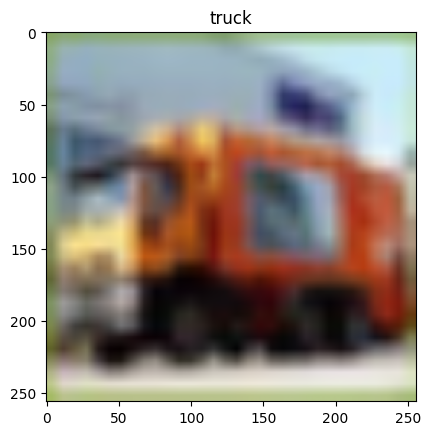

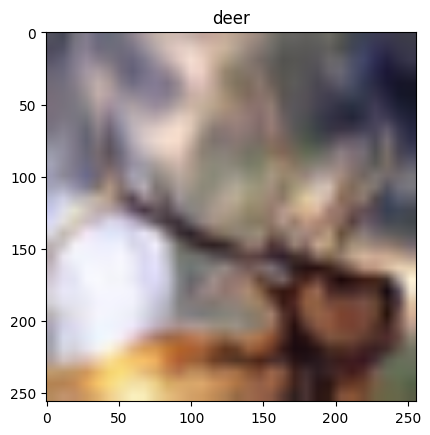

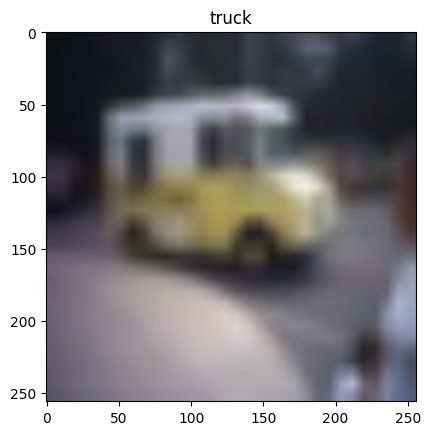

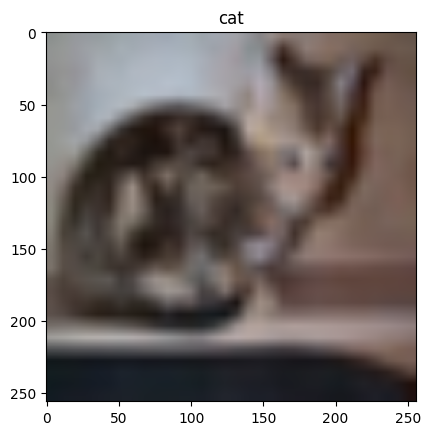

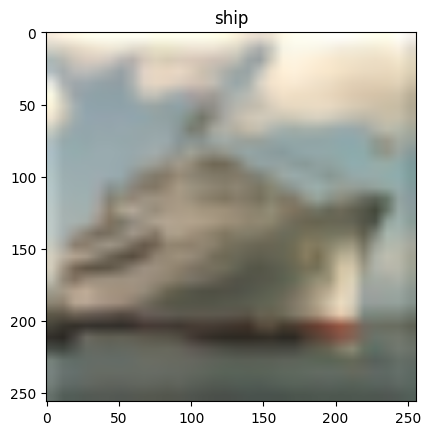

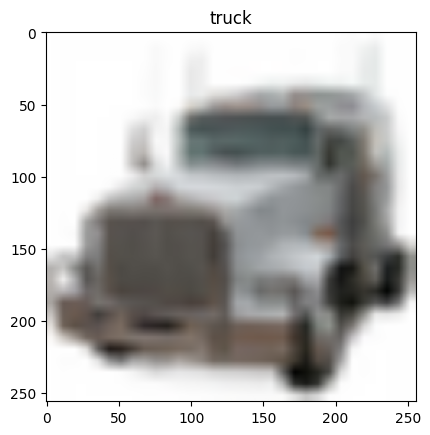

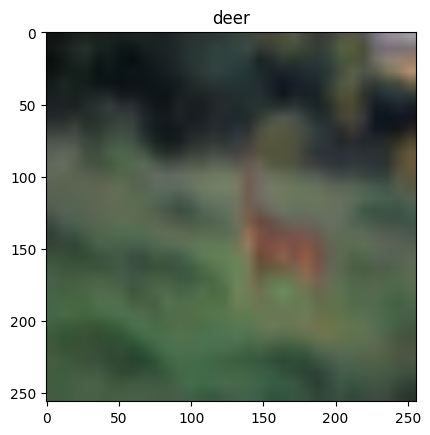

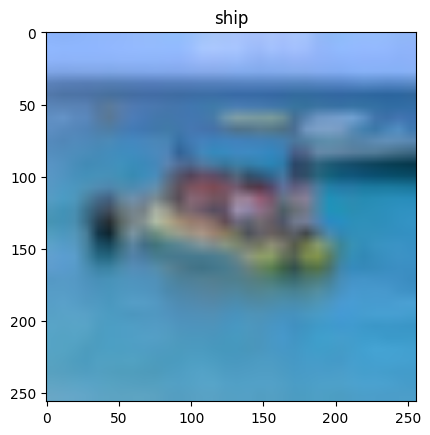

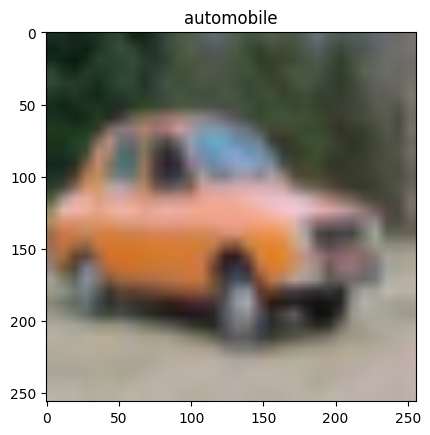

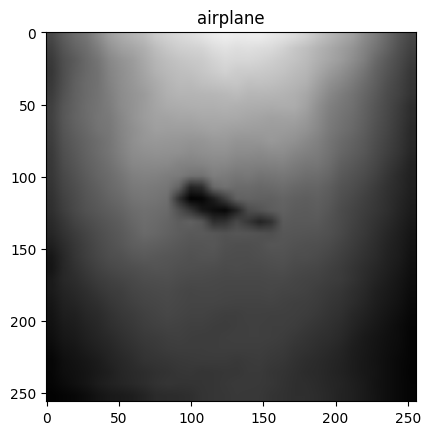

In [ ]:
plotting_random_images(train_data_custom,train_data_custom.labels)

In [ ]:
dataloader = DataLoader(
      train_data_custom,
      batch_size=128,
      shuffle=True,
      num_workers=8,
      pin_memory=True,
  )

In [ ]:
def build_full_grid(imgs, grid, n_skip_row, n_skip_col, n_rows, n_cols, img_shape):
    for row in range(n_rows):
        # iterate through the columns
        for col in range(n_cols):
            # get the image index
            img_idx = row * n_cols + col + n_skip_row * row + n_skip_col * col
            img = imgs[img_idx]
            img = cv2.resize(img, (img_shape[1], img_shape[0]))
            # add the image to the grid
            grid[row * img_shape[0]:(row + 1) * img_shape[0], col * img_shape[1]:(col + 1) * img_shape[1], :] = img
    # return the grid
    return grid

def build_grid(data_loader, grid_size=(9,9)):
    '''Given a data loader build a grid of images to visualize the dataset passed to the model'''
    # get the list of images
    grid_h, grid_w = grid_size
    print("Grid size: ", grid_h * grid_w)
    imgs = []
    i = 0
    for (batch, label) in data_loader:
        for img in batch:
            img_add = img.permute(1,2,0).numpy()
            # img_add =  img_add * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
            img_add = img_add * 255
            imgs.append(img_add)
            i += 1
            if i == grid_h * grid_w:
                break
        if i == grid_h * grid_w:
            break
    # get the number of images
    n_images = len(imgs)
    # get the number of rows and columns
    n_rows, n_cols = grid_size
    # get the number of images to be displayed
    n_display_images = n_rows * n_cols
    # get the number of images to be skipped
    n_skip_images = n_images - n_display_images
    # get the number of images to be skipped per row
    n_skip_row = n_skip_images // n_rows
    # get the number of images to be skipped per column
    n_skip_col = n_skip_images % n_rows
    # get the image size
    img = imgs[0]
    # get the image shape
    img_shape = img.shape
    # get the grid size
    grid_size = (img_shape[0] * n_rows, img_shape[1] * n_cols, img_shape[2])
    # create a grid of images
    grid = np.zeros(grid_size, dtype=np.uint8)
    # iterate through the rows
    grid = build_full_grid(imgs, grid, n_skip_row, n_skip_col, n_rows, n_cols, img_shape)
    return grid

Grid size:  81


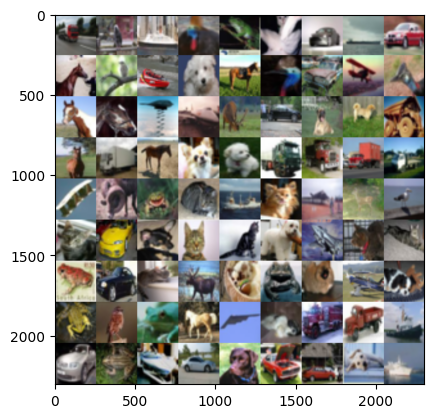

In [ ]:
grid =build_grid(dataloader)
plt.imshow(grid)
plt.show()

In [ ]:
from torch import nn
from torchvision import  models
from torchvision.models import resnet50

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = resnet50(pretrained=True).to(device)

for param in model.parameters():
    param.requires_grad = False

num_classes = 10
classifier = nn.Sequential(
    nn.Linear(2048, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes),  ).to(device)
model.fc = classifier

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device):

    model.train()


    train_loss, train_acc = 0, 0





    for batch, (X, y) in tqdm(enumerate(dataloader), desc='training epoch'):


        X, y = X.to(device), y.to(device)


        y_pred = model(X)


        loss = loss_fn(y_pred, y)
        train_loss += loss.item()




        optimizer.zero_grad()


        loss.backward()


        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)





    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          starting_epochs: int,
          epochs: int,
          device: torch.device,
          checkpoint_interval: int):

    print("Training Data Size:", len(train_dataloader.dataset))
    results = {"train_loss": [],
        "train_acc": []}
    highest_train_accuracy = 0.0
    pbar = tqdm(total=epochs, initial=starting_epochs, dynamic_ncols=True, desc="Training")
    for epoch in range(starting_epochs, epochs):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | ")
        if (epoch + 1) % checkpoint_interval == 0:
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': train_loss,
                'train_acc': train_acc
            }, f'checkpoint_epoch_last.pth')
        if train_acc > highest_train_accuracy:
          highest_train_accuracy = train_acc
          torch.save(model, 'model.pth')
          torch.save(model.state_dict(), "classifier_param.pth")
        pbar.update(1)


        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
    print(
        f"Highest Train Accuracy: {highest_train_accuracy:.4f} | ")
    return results

In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.fc.parameters(), lr=0.01, momentum=0.9)

In [ ]:
model_results= train(model=model,
             train_dataloader=dataloader,
             loss_fn=criterion,
             optimizer=optimizer,
             starting_epochs= 0,
             epochs=5,
             device=device,
             checkpoint_interval=5)
print(model_results)

Training Data Size: 50000


Training:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

training epoch: 0it [00:00, ?it/s]

Epoch: 1 | train_loss: 0.6384 | train_acc: 0.7807 | 


Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the mod

training epoch: 0it [00:00, ?it/s]

Epoch: 2 | train_loss: 0.6122 | train_acc: 0.7891 | 


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

training epoch: 0it [00:00, ?it/s]

Epoch: 3 | train_loss: 0.5987 | train_acc: 0.7937 | 


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

training epoch: 0it [00:00, ?it/s]

Epoch: 4 | train_loss: 0.5867 | train_acc: 0.7969 | 


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

training epoch: 0it [00:00, ?it/s]

Epoch: 5 | train_loss: 0.5736 | train_acc: 0.8009 | 
Highest Train Accuracy: 0.8009 | 
{'train_loss': [0.6383882244224743, 0.6122419520107376, 0.5986579532361092, 0.5866795945960237, 0.5735831296504916], 'train_acc': [0.7807304987212276, 0.7890984654731459, 0.79375, 0.7968789961636829, 0.8009191176470588]}


In [ ]:
class_names = train_data_custom.labels
def predict_image(image):
    transformer= transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256), antialias=True),


])


    image_tensor = transformer(image).unsqueeze(0)  # Add a batch dimension
    # Make a prediction
    with torch.no_grad():
        output = model(image_tensor.to(device))


    # Get the predicted class index and probability
    target_image_pred_probs = torch.softmax(output, dim=1)
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)


    return class_names[target_image_pred_label], target_image_pred_label

In [ ]:
archive_test = py7zr.SevenZipFile('/content/test.7z',mode='r')
archive_test.extractall()
archive_test.close()